In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.metrics import confusion_matrix, classification_report


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

<IPython.core.display.Javascript object>

### Dataset Overview:

Dataset from kaggle: https://www.kaggle.com/shubhamsarafo/advertising 


The dataset consists of __1000 observations__ and __10 columns__. This data set contains the following features:


| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| Daily Time Spent on Site           |Amount of time in the website by the customer (in minutes)                                                  | 
| Age      | Age of the customer                        |  
| Area Income        | Avg. Income of geographical area of consumer                                           | 
| Daily Internet Usage          | Daily average time spent on the internet by the customer (in minutes)                                        |   
| Ad Topic Line           | Headline of the advertisement                                          |
| City           | City of the customer                                       |
| Male         | Indicates whether the customer is male or not (1 - Male; 0 - Female)  |
| Country         | Country of the customer  |
| Timestamp         | Time at which customer clicked on Ad or closed window  |
| Clicked on Ad         | 0 or 1  (1 indicated clicking on Ad)|


### Goal

Can I predict if a customer is going to cklick on an Ad based on customer's information: age, sex, time spent on the site and on the internet in general, timestamp, average income from customer's geographical area, city, country as well as the Ad headline?

### Uploading and Cleaning Data

In [3]:
# read imported data from: https://www.kaggle.com/shubhamsarafo/advertising

ad_df = pd.read_csv("data/advertising.csv")
ad_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/16 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,Boe,1,Nauru,4/4/16 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/16 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/16 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/16 3:36,0


<IPython.core.display.Javascript object>

In [4]:
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


<IPython.core.display.Javascript object>

Based on this information, none of the columns have null values, and while 3 of the column entries are integer values, and 3 are floating numbers, 4 of the column entries are categorical in nature. Now, I will inspect the statistic data and the number of unique entries for each column to get a better sense of the data.

In [5]:
ad_df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


<IPython.core.display.Javascript object>

In [6]:
# check if there are duplicated records
ad_df.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [7]:
# check how many unique countries are
ad_df["Country"].nunique()

237

<IPython.core.display.Javascript object>

In [8]:
# check how many unique cities are
ad_df["City"].nunique()

969

<IPython.core.display.Javascript object>

In [9]:
# check how many unique Ads are
ad_df["Ad Topic Line"].nunique()

1000

<IPython.core.display.Javascript object>

In [10]:
ad_df["Clicked on Ad"].value_counts()

1    500
0    500
Name: Clicked on Ad, dtype: int64

<IPython.core.display.Javascript object>

Dataset is perfect balanced

The dataset is very clean, no missing values or duplicates so we can proceed with exploratory data analysis.

### Exploratory Data Analysis

* Which customers clicked more on an Ad?

Text(0.5, 1.0, 'Age wise distribution of Ad clicks')

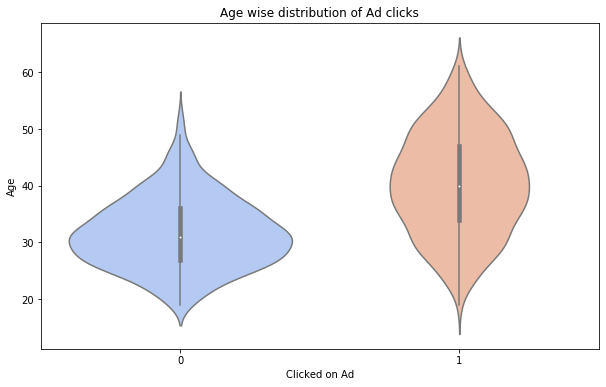

<IPython.core.display.Javascript object>

In [11]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=ad_df["Clicked on Ad"], y=ad_df["Age"], data=ad_df, palette="coolwarm")
plt.title("Age wise distribution of Ad clicks")


Customers with an average around 40 years old are the most contributors to ad clickings.

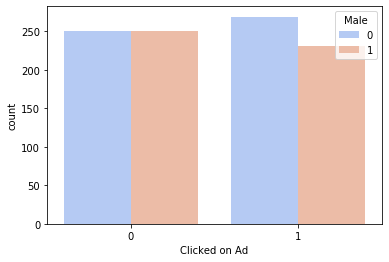

<IPython.core.display.Javascript object>

In [12]:
sns.countplot(x="Clicked on Ad", data=ad_df, hue="Male", palette="coolwarm")
plt.show()

Females tend to click more on Ads.

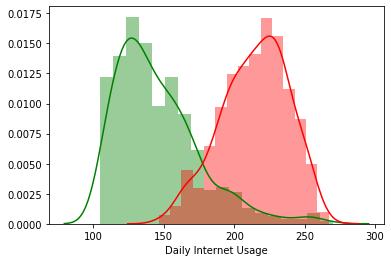

<IPython.core.display.Javascript object>

In [13]:
sns.distplot(ad_df["Daily Internet Usage"][ad_df["Clicked on Ad"] == 1], color="green")
sns.distplot(ad_df["Daily Internet Usage"][ad_df["Clicked on Ad"] == 0], color="red")
plt.show()

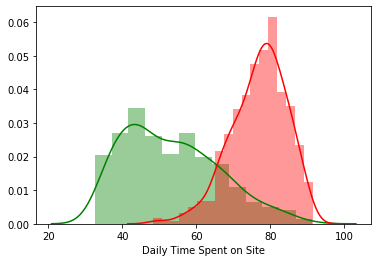

<IPython.core.display.Javascript object>

In [14]:
sns.distplot(
    ad_df["Daily Time Spent on Site"][ad_df["Clicked on Ad"] == 1], color="green"
)
sns.distplot(
    ad_df["Daily Time Spent on Site"][ad_df["Clicked on Ad"] == 0], color="red"
)
plt.show()

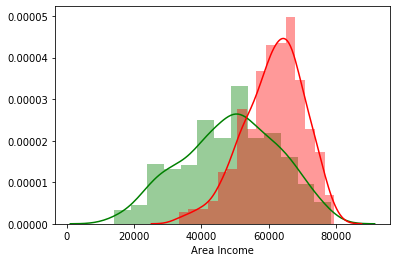

<IPython.core.display.Javascript object>

In [15]:
sns.distplot(ad_df["Area Income"][ad_df["Clicked on Ad"] == 1], color="green")
sns.distplot(ad_df["Area Income"][ad_df["Clicked on Ad"] == 0], color="red")
plt.show()

* Visualizing relations between all numerical features and label

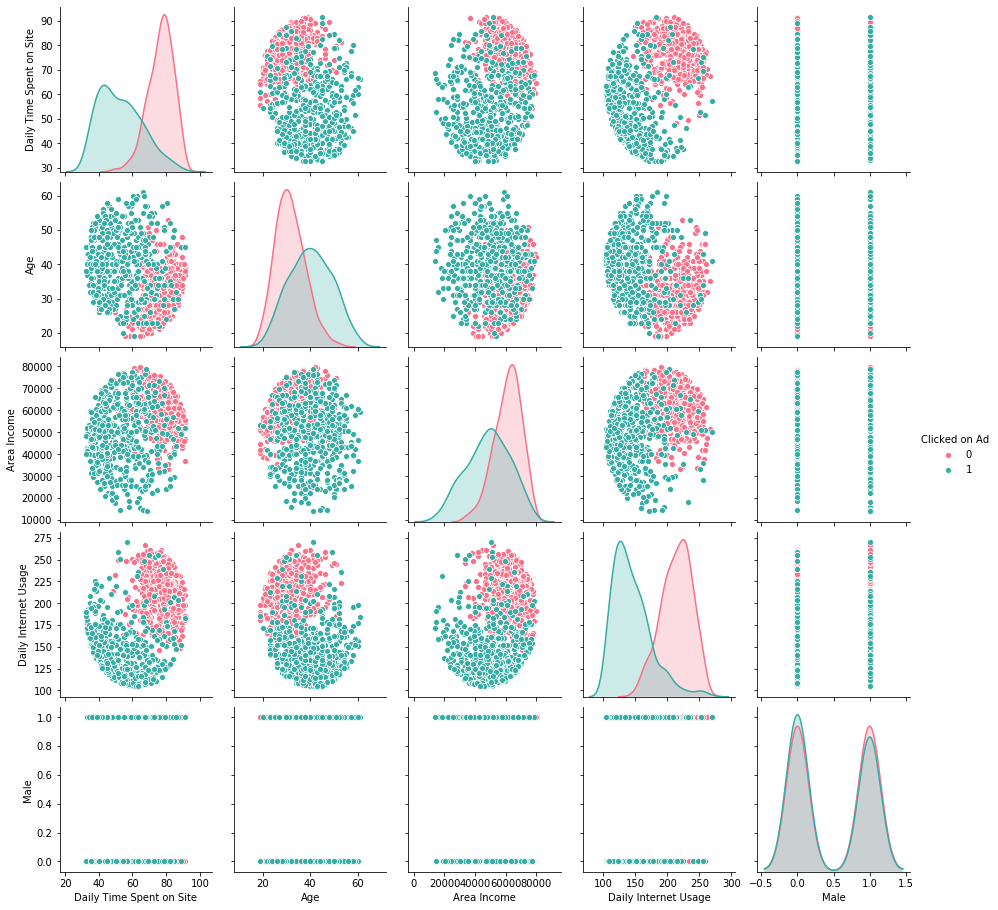

<IPython.core.display.Javascript object>

In [16]:
sns.pairplot(ad_df, hue="Clicked on Ad", palette="husl")

Customers who have clicked on the ad are:
* older, with an average around 40 years old
* those who spent less time browsing the internet and who spent less time on the site
* from regions with a lower average income

Females clicked on ads a bit more than males.

There is a relatively good separation between our classes which will make our predictions more accurate.

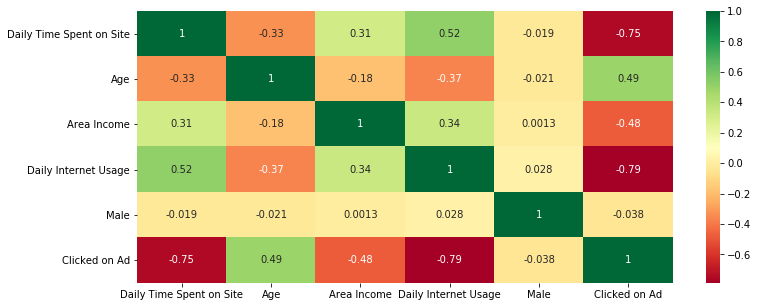

<IPython.core.display.Javascript object>

In [17]:
plt.figure(figsize=(12, 5))
# sns.heatmap(df.corr(), annot=True)
sns.heatmap(ad_df.corr(), cmap="RdYlGn", annot=True)
plt.show()

From the heat map looks like the best predictors for Clicking on the ad would be Daily Time Spent on Site and Daily Internet Usage.

* Let's investigate the categorical features:

There are 1000 unique ads, so encoding these would be near impossible using One Hot Encode, so let's check most common words

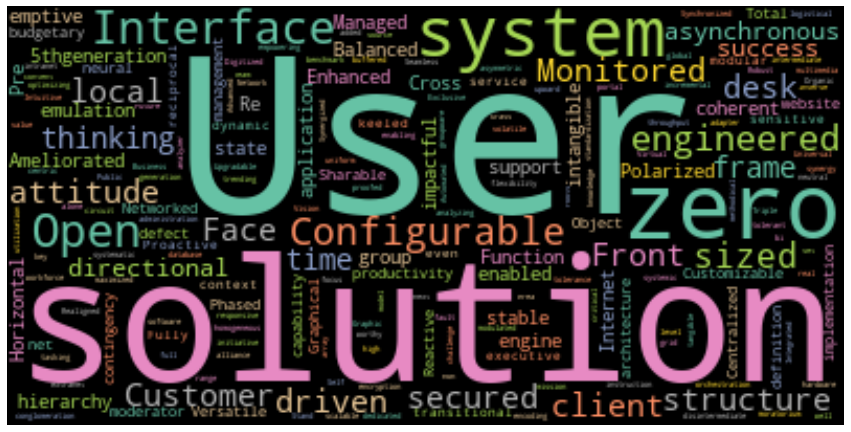

<IPython.core.display.Javascript object>

In [18]:
stopwords = set(STOPWORDS)
stopwords.update(["Multi", "based", "focused", "oriented", "line"])

wordcloud = WordCloud(
    random_state=1,
    background_color="black",
    colormap="Set2",
    collocations=False,
    stopwords=stopwords,
).generate(" ".join(ad_df["Ad Topic Line"]))

plt.figure(figsize=(15, 10))
# Display the generated image

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

No useful information regarding the Topic Line of the Ads

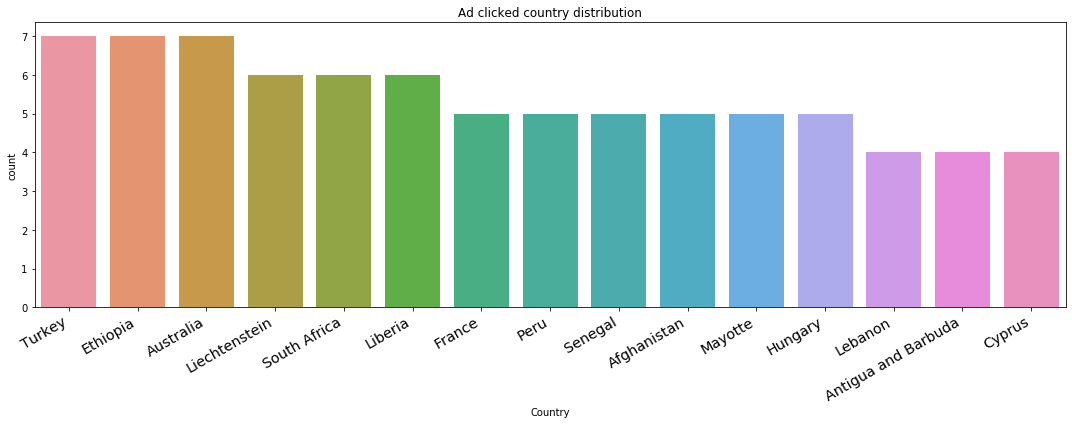

<IPython.core.display.Javascript object>

In [19]:
# Distribution of top 15 country's ad clicks
plt.figure(figsize=(15,6))
chart=sns.countplot(
    x='Country',
    data=ad_df[ad_df['Clicked on Ad']==1],
    order=ad_df[ad_df['Clicked on Ad']==1]['Country'].value_counts().index[:15])

chart.set_xticklabels(chart.get_xticklabels(),
    rotation=30,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large') 
plt.title('Ad clicked country distribution')

plt.tight_layout()


No useful information regarding the customer's country of origin.

Similar for the customer's City (there are >900 cities)

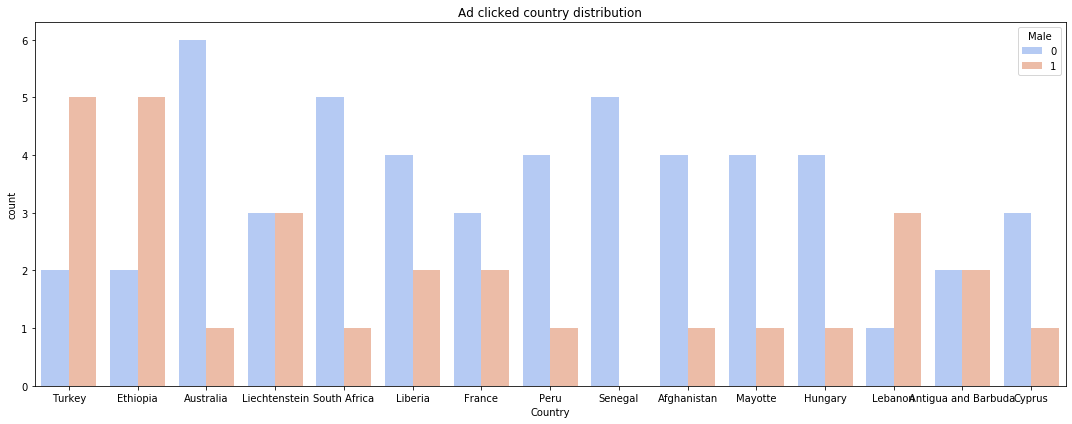

<IPython.core.display.Javascript object>

In [20]:
plt.figure(figsize=(15, 6))
sns.countplot(
    x="Country",
    data=ad_df[ad_df["Clicked on Ad"] == 1],
    order=ad_df[ad_df["Clicked on Ad"] == 1]["Country"].value_counts().index[:15],
    hue="Male",
    palette="coolwarm",
)
plt.title("Ad clicked country distribution")
plt.tight_layout()

Most are developing countries and females are the active contributors.

### Feature Selection and Engineering

In [21]:
# Changing the datetime object
ad_df["Timestamp"] = pd.to_datetime(ad_df["Timestamp"])

# Extracting Timestamp to generate new columns as Month, Day, Hour and Weekday
# ad_df["Timestamp"].dt.hour
ad_df["Hour"] = ad_df["Timestamp"].dt.hour
ad_df["Month"] = ad_df["Timestamp"].dt.month
ad_df["Day_number"] = ad_df["Timestamp"].dt.weekday
ad_df["Day_name"] = ad_df["Timestamp"].dt.day_name()

<IPython.core.display.Javascript object>

In [22]:
ad_df = ad_df.drop(columns=["Timestamp"])

# checking the database
ad_df.head(1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Hour,Month,Day_number,Day_name
0,68.95,35,61833.9,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,0,3,6,Sunday


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Ad clicked hourly distribution')

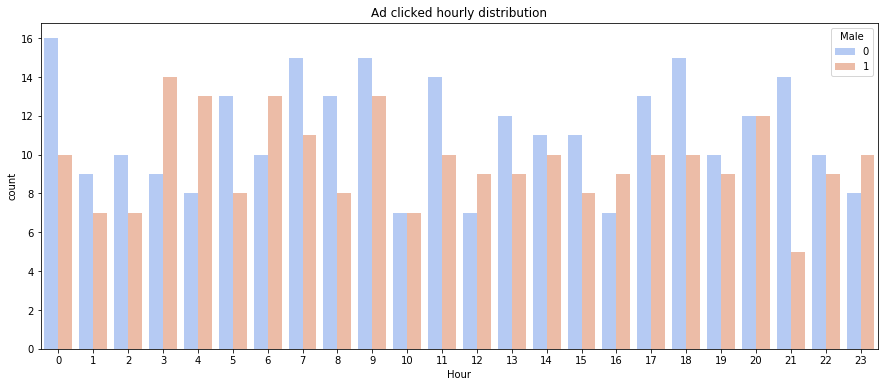

<IPython.core.display.Javascript object>

In [23]:
# Hourly distribution of ad clicks
plt.figure(figsize=(15, 6))
sns.countplot(
    x="Hour", data=ad_df[ad_df["Clicked on Ad"] == 1], hue="Male", palette="coolwarm"
)
plt.title("Ad clicked hourly distribution")

Uneven daytime frequency, females are the main contributor on ad clicks

Text(0.5, 1.0, 'Ad clicked daily distribution')

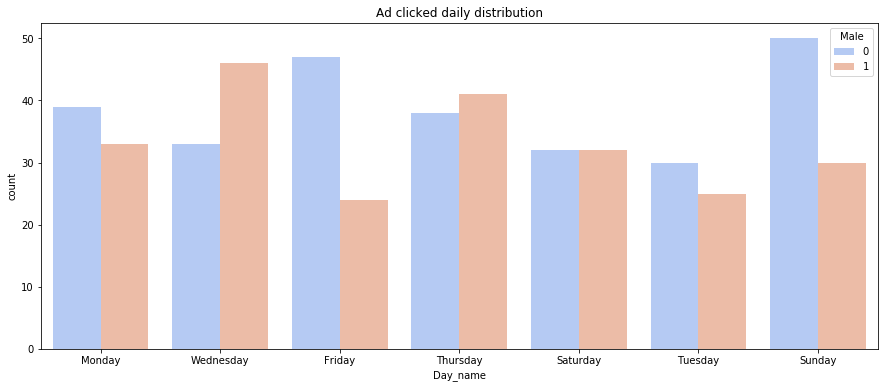

<IPython.core.display.Javascript object>

In [24]:
# Daily distribution of ad clicks
plt.figure(figsize=(15, 6))
sns.countplot(
    x="Day_name",
    data=ad_df[ad_df["Clicked on Ad"] == 1],
    hue="Male",
    palette="coolwarm",
)
plt.title("Ad clicked daily distribution")

Uneven frequency, most of the days females clicked an  ad more than males except Wednesdays and Thursdays.

Text(0.5, 1.0, 'Ad clicked monthly distribution')

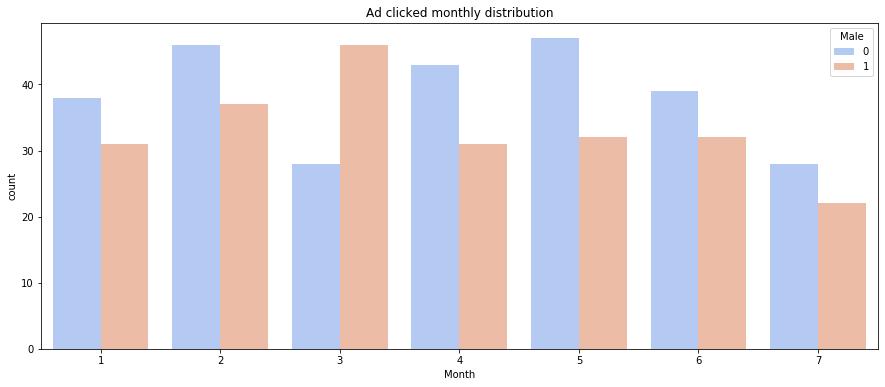

<IPython.core.display.Javascript object>

In [25]:
# Monthly distribution of ad clicks
plt.figure(figsize=(15, 6))
sns.countplot(
    x="Month", data=ad_df[ad_df["Clicked on Ad"] == 1], hue="Male", palette="coolwarm"
)
plt.title("Ad clicked monthly distribution")

Same uneven frequency, and females clicked on ads the most except for March.

In [26]:
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Clicked on Ad             1000 non-null   int64  
 9   Hour                      1000 non-null   int64  
 10  Month                     1000 non-null   int64  
 11  Day_number                1000 non-null   int64  
 12  Day_name                  1000 non-null   object 
dtypes: float64(3), int64(6), object(4)
memory usage: 101.7+ KB


<IPython.core.display.Javascript object>

* Checking the correlation matrix

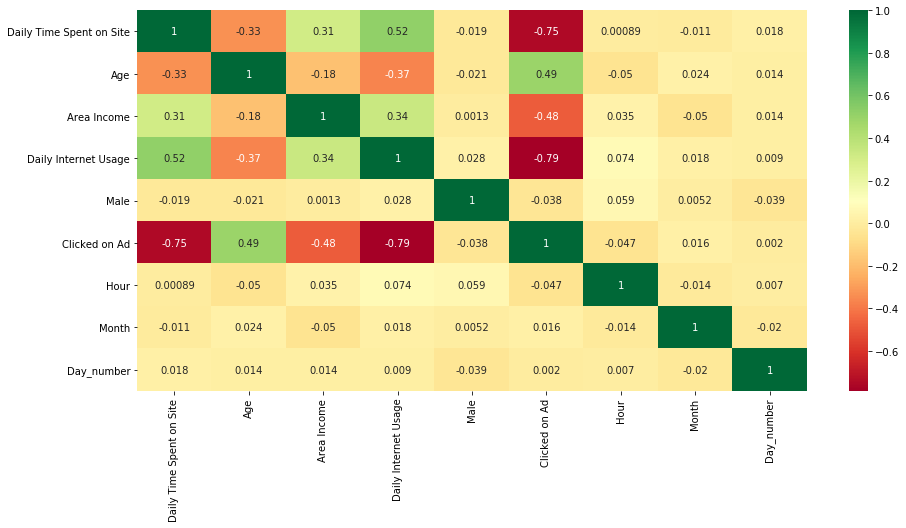

<IPython.core.display.Javascript object>

In [27]:
plt.figure(figsize=(15, 7))
sns.heatmap(ad_df.corr(), cmap="RdYlGn", annot=True)
plt.show()

None of the new features have good correlation with the label and the other features. 

We can drop them or we can keep them for a more accurate model.

### Prep data for modeling

We'll transform our numeric variables and we'll drop the cateforical variable, but first we'll plit the data into X & y and then into a training set (80%) and a test set (20%).

In [28]:
# We are dropping the categorical features which we'll not be encoding
drop_cols = [
    "Clicked on Ad",
    "Ad Topic Line",
    "City",
    "Country",
    "Day_number",
]

X = ad_df.drop(columns=drop_cols)
y = ad_df["Clicked on Ad"]

<IPython.core.display.Javascript object>

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

<IPython.core.display.Javascript object>

In [30]:
X_train.head(1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Hour,Month,Day_name
747,49.13,32,41097.17,120.49,0,0,1,Friday


<IPython.core.display.Javascript object>

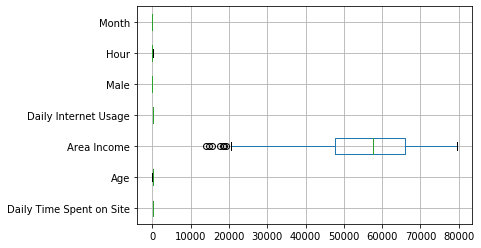

<IPython.core.display.Javascript object>

In [31]:
#cheching the distribution of the numerical cols
X_train.boxplot(vert=False)
plt.show()


In [32]:
# First, defining the numerical, catehgorical and binary volumns
# Defining the catgeory to be removed from the categorical features encoding due to redundancy
# TODO Month being as nominal category
num_cols = [
    "Age",
    "Daily Time Spent on Site",
    "Daily Internet Usage",
    "Area Income",
    "Month",
]
bin_cols = ["Male"]
cat_cols = ["Hour", "Day_name"]
drop_cats = [0, "Monday"]

<IPython.core.display.Javascript object>

### Modeling

We will be using Logistic Regression, Random Forest Classifier, KNeighbors Classifier, and Gradient Boosting Classifier models to predict whether a customer would click on an Ad. First we'll create a templete for modeling and for model optimization which will be appied to all models mentioned above.

In [33]:
# Defining a Template for modelling
# fmt: off

# 1. Define a ColumnTransformer to scale the numeric columns and encode the categoricaal ones.
# Leave the remaining columns untouched

# preprocessing = ColumnTransformer([
#    ("scale", StandardScaler(), num_cols),
#    ("encode_cats", OneHotEncoder(drop=drop_cats), cat_cols),
# ], remainder="passthrough")

# 2. Define a Pipeline with: the ColumnTransformer preprocessing as the first step and the model
# as the second step

# pipeline = Pipeline([
#    ("preprocessing", preprocessing),
#    ("model", LogisticRegression()),
#     ("model", RandomForestClassifier()),
#     ("model", KNeighborsClassifier()),
#     ("model", GradientBoostingClassifier()),
# ])

# 3. Fit the pipeline to the training data with the default params

# pipeline.fit(X_train, y_train)

# print(f"Train score: {pipeline.score(X_train, y_train):.4f}")
# print(f"Test score: {pipeline.score(X_test, y_test):.4f}")

# print_score(pipeline, X_train, y_train, X_test, y_test, train=True)
# print_score(pipeline, X_train, y_train, X_test, y_test, train=False)

# 4. Model optimization: Tuning hyperparametres

# grid = {
#    "model__": [],
#    "model__": [],
# }

# pipeline_cv = GridSearchCV(pipeline, grid, verbose=1, cv=2, n_jobs=-1)
# pipeline_cv.fit(X_train, y_train)

# train_score = pipeline_cv.score(X_train, y_train)
# test_score = pipeline_cv.score(X_test, y_test)

# print(f"Train score: {pipeline_cv.score(X_train, y_train):.4f}")
# print(f"Test score: {pipeline_cv.score(X_test, y_test):.4f}")

# pipeline_cv.best_params_

# fmt: on

<IPython.core.display.Javascript object>

### Implementing Logistic Regression

Logistic regression is the go-to linear classification algorithm for two-class problems. It is easy to implement, easy to understand and gets great results on a wide variety of problems.

In [34]:
# Template for modelling
# fmt: off
# Define a ColumnTransformer to scale the numeric columns and to encode the categorical ones 
# Leave the remaining columns untouched

preprocessing = ColumnTransformer([
    ("scale", StandardScaler(), num_cols),
    ("encode_cats", OneHotEncoder(drop=drop_cats), cat_cols),
], remainder="passthrough")

#Define a Pipeline with: the ColumnTransformer preprocessing as the first step and the model the second step

lr = Pipeline([
    ("preprocessing", preprocessing),
    ("model", LogisticRegression()),
#     ("model", RandomForestClassifier()),
#     ("model", KNeighborsClassifier()),
#     ("model", GradientBoostingClassifier()),
])

# Fit the pipeline to the training data with the default params
lr.fit(X_train, y_train)

train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

print(f"Train score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

# fmt: on

Train score: 0.9750
Test score: 0.9800


<IPython.core.display.Javascript object>

#### Logistic Regression Optimization - hyperparameters tuning

Now, let's see if we can improve the overall accuracy of the model through optimizing the parameters by using Grid Search with cross validation. We will optimize the C, or the regularization parameter; the solver, which is the algorithm used in the optimization;, and the penalty, as L1 (LASSO) or L2 (Ridge) regression.

In [35]:
# fmt: off
grid = {
    "model__penalty": ["l1", "l2", "none", "elasticnet"],
#    "model__C": [0.01, 0.1, 1, 10],
    "model__C": [0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    "model__class_weight": [{1: 0.5, 0: 0.5}, {1: 0.4, 0: 0.6}, {1: 0.6, 0: 0.4}, {1: 0.7, 0: 0.3},],
}

lr_cv = GridSearchCV(lr, grid, verbose=1, cv=2, n_jobs=-1)
lr_cv.fit(X_train, y_train)

train_score = lr_cv.score(X_train, y_train)
test_score = lr_cv.score(X_test, y_test)

print(f"Train score: {lr_cv.score(X_train, y_train):.4f}")
print(f"Test score: {lr_cv.score(X_test, y_test):.4f}")

lr_cv.best_params_

Fitting 2 folds for each of 144 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s


Train score: 0.9712
Test score: 0.9800


[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:    2.8s finished


{'model__C': 0.4,
 'model__class_weight': {1: 0.5, 0: 0.5},
 'model__penalty': 'l2'}

<IPython.core.display.Javascript object>

#### Evaluate the Logistic Regression Model

In [36]:
y_pred = lr_cv.predict(X_test)

confusion_mat = confusion_matrix(y_test, y_pred)
confusion_df = pd.DataFrame(
    confusion_mat,
    index=["actual_Not_CHD", "actual_CHD"],
    columns=["pred_Not_CHD", "pred_CHD"],
)
display(confusion_df)

,pred_Not_CHD,pred_CHD
actual_Not_CHD,99,1
actual_CHD,3,97


<IPython.core.display.Javascript object>

It appears that the results from optimization are similar with the ones from default logistic regression model.

In [37]:
# To visualize our mistakes we might put our data back into a dataframe.
diagnostic_df = pd.DataFrame(X_test, columns=X_train.columns)
diagnostic_df["clicked"] = y_test.values
diagnostic_df["click_pred"] = y_pred

<IPython.core.display.Javascript object>

In [38]:
# Add a column indicating True or False when we made an error in prediction.
diagnostic_df["error"] = diagnostic_df["clicked"] != diagnostic_df["click_pred"]
diagnostic_df.head(1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Hour,Month,Day_name,clicked,click_pred,error
832,41.46,42,52177.4,128.98,1,8,5,Monday,1,1,False


<IPython.core.display.Javascript object>

In [39]:
diagnostic_df.loc[diagnostic_df["error"] != False]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Hour,Month,Day_name,clicked,click_pred,error
702,87.27,30,51824.01,204.27,1,6,3,Sunday,1,0,True
305,79.81,24,56194.56,178.85,1,11,5,Tuesday,1,0,True
181,84.53,27,40763.13,168.34,0,21,1,Monday,1,0,True
998,55.55,19,41920.79,187.95,0,2,3,Thursday,0,1,True


<IPython.core.display.Javascript object>

Unfortunately I see find any reason for our mistakes, based on customer information

### Implementing K Nearest Neighbors Classifier

K Nearest Neighbors Classifier model classifies data points based on their similarity to other data points.

In [40]:
# Template for modelling
# fmt: off
# Define a ColumnTransformer to scale the numeric columns and to encode the categorical ones 
# Leave the remaining columns untouched

preprocessing = ColumnTransformer([
    ("scale", StandardScaler(), num_cols),
    ("encode_cats", OneHotEncoder(drop=drop_cats), cat_cols),
], remainder="passthrough")

#Define a Pipeline with: the ColumnTransformer preprocessing as the first step and the model the second step

knn = Pipeline([
    ("preprocessing", preprocessing),
#    ("model", LogisticRegression()),
#     ("model", RandomForestClassifier()),
     ("model", KNeighborsClassifier()),
#     ("model", GradientBoostingClassifier()),
])

# Fit the pipeline to the training data with the default params
knn.fit(X_train, y_train)

train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)

print(f"Train score: {knn.score(X_train, y_train):.4f}")
print(f"Test score: {knn.score(X_test, y_test):.4f}")

# fmt: on

Train score: 0.9663
Test score: 0.9750


/Users/cri/anaconda3/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
/Users/cri/anaconda3/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


<IPython.core.display.Javascript object>

These values of accuracy for the training and test sets are good but not quite as good as for the logistic regression model.

#### KNN Optimization - hyperparameters tuning

Now, let's see if we can improve the overall accuracy of the model through optimizing the parameters by using Grid Search with cross validation. We will optimize the number of nearest neighbors the model uses to compare and classify points.

In [41]:
# fmt: off
grid = {
    "model__n_neighbors": [1, 5, 10, 25, 50],
}

knn_cv = GridSearchCV(knn, grid, verbose=1, cv=2, n_jobs=-1)
knn_cv.fit(X_train, y_train)

train_score = knn_cv.score(X_train, y_train)
test_score = knn_cv.score(X_test, y_test)

print(f"Train score: {knn_cv.score(X_train, y_train):.4f}")
print(f"Test score: {knn_cv.score(X_test, y_test):.4f}")

knn_cv.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.1s remaining:    0.1s


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished
/Users/cri/anaconda3/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


Train score: 0.9563
Test score: 0.9750


/Users/cri/anaconda3/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


{'model__n_neighbors': 50}

<IPython.core.display.Javascript object>

#### Evaluate the KNN Model

In [42]:
y_pred = knn_cv.predict(X_test)

confusion_mat = confusion_matrix(y_test, y_pred)
confusion_df = pd.DataFrame(
    confusion_mat,
    index=["actual_Not_CHD", "actual_CHD"],
    columns=["pred_Not_CHD", "pred_CHD"],
)
display(confusion_df)

/Users/cri/anaconda3/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


,pred_Not_CHD,pred_CHD
actual_Not_CHD,100,0
actual_CHD,5,95


<IPython.core.display.Javascript object>

It appears that the results from optimization are similar with the ones from default KNN model.

### Implementing Random Forest Classifier

Random Forest Classifier model creates a set of decision trees and then aggregates the votes from all of the decision trees to decide the class of the test case.

In [43]:
# Template for modelling
# fmt: off
# Define a ColumnTransformer to scale the numeric columns and to encode the categorical ones 
# Leave the remaining columns untouched

preprocessing = ColumnTransformer([
    ("scale", StandardScaler(), num_cols),
    ("encode_cats", OneHotEncoder(drop=drop_cats), cat_cols),
], remainder="passthrough")

#Define a Pipeline with: the ColumnTransformer preprocessing as the first step and the model the second step

rf = Pipeline([
    ("preprocessing", preprocessing),
#    ("model", LogisticRegression()),
     ("model", RandomForestClassifier()),
#     ("model", KNeighborsClassifier()),
#     ("model", GradientBoostingClassifier()),
])

# Fit the pipeline to the training data with the default params
rf.fit(X_train, y_train)

train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)

print(f"Train score: {rf.score(X_train, y_train):.4f}")
print(f"Test score: {rf.score(X_test, y_test):.4f}")

# fmt: on

Train score: 1.0000
Test score: 0.9700


/Users/cri/anaconda3/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
/Users/cri/anaconda3/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


<IPython.core.display.Javascript object>

#### Random Forest Optimization - hyperparameters tuning

We will optimize the number of estimators, meaning number of trees used to aggregate the class; the number of features used to consider the best split; the minimum samples split, which indicates the number of samples used to find a node; and the maximum depth of the trees, indicating how many branches the tree has.

In [44]:
# fmt: off
grid = {
    "model__n_estimators": [10,100,500],
    "model__max_features":['auto', 'sqrt', 'log2'],
    "model__min_samples_split":[2,8,20],
    "model__max_depth":[5,6,7,8],
}

rf_cv = GridSearchCV(rf, grid, verbose=1, cv=2, n_jobs=-1)
rf_cv.fit(X_train, y_train)

train_score = rf_cv.score(X_train, y_train)
test_score = rf_cv.score(X_test, y_test)

print(f"Train score: {rf_cv.score(X_train, y_train):.4f}")
print(f"Test score: {rf_cv.score(X_test, y_test):.4f}")

rf_cv.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 2 folds for each of 108 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   16.0s finished


Train score: 0.9838
Test score: 0.9650


/Users/cri/anaconda3/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
/Users/cri/anaconda3/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


{'model__max_depth': 6,
 'model__max_features': 'log2',
 'model__min_samples_split': 8,
 'model__n_estimators': 500}

<IPython.core.display.Javascript object>

#### Evaluate the Random Forest Model

In [45]:
y_pred = rf_cv.predict(X_test)

confusion_mat = confusion_matrix(y_test, y_pred)
confusion_df = pd.DataFrame(
    confusion_mat,
    index=["actual_Not_CHD", "actual_CHD"],
    columns=["pred_Not_CHD", "pred_CHD"],
)
display(confusion_df)

/Users/cri/anaconda3/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


,pred_Not_CHD,pred_CHD
actual_Not_CHD,96,4
actual_CHD,3,97


<IPython.core.display.Javascript object>

It appears that the results from Random Forest optimization are similar with the ones from default model however both Logistic Regression an KNN Classifier have better results.

### Implementing Gradient Boosting Classifier

This model uses decision trees and minimizes the negative log-likelihood of the trees. In using this ensemble method, the less effective decision trees are then compiled into one stronger model by learning from the previous models.

In [46]:
# Template for modelling
# fmt: off
# Define a ColumnTransformer to scale the numeric columns and to encode the categorical ones 
# Leave the remaining columns untouched

preprocessing = ColumnTransformer([
    ("scale", StandardScaler(), num_cols),
    ("encode_cats", OneHotEncoder(drop=drop_cats), cat_cols),
], remainder="passthrough")

#Define a Pipeline with: the ColumnTransformer preprocessing as the first step and the model the second step

gb = Pipeline([
    ("preprocessing", preprocessing),
#    ("model", LogisticRegression()),
#     ("model", RandomForestClassifier()),
#     ("model", KNeighborsClassifier()),
     ("model", GradientBoostingClassifier()),
])

# Fit the pipeline to the training data with the default params
gb.fit(X_train, y_train)

train_score = gb.score(X_train, y_train)
test_score = gb.score(X_test, y_test)

print(f"Train score: {gb.score(X_train, y_train):.4f}")
print(f"Test score: {gb.score(X_test, y_test):.4f}")

# fmt: on

Train score: 1.0000
Test score: 0.9600


/Users/cri/anaconda3/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
/Users/cri/anaconda3/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


<IPython.core.display.Javascript object>

#### Gradient Boosting Classifier Optimization - hyperparameters tuning

We will use the deviance loss function to use the logistic regression loss function. We will also optimize the:
* the minimum samples split, which indicates the number of samples used to find a node;
* the minimium samples per leaf, which determines the minimium number of samples in a terminal node;
* the maximum depth of the trees, indicating how many branches the tree has;
* the number of features used to consider the best split;
* the fraction of the observations used in subsampling for each tree;
* and the number of estimators, meaning number of trees used to be modeled.

In [47]:
# fmt: off
grid = {
    "model__loss":['deviance'],
    "model__min_samples_split":[50,100,200],
    "model__min_samples_leaf":[25,50,75],
    "model__max_depth":[5,6,7,8],
    "model__max_features":['sqrt'],
    "model__subsample":[0.6,0.8],
    "model__n_estimators":[50,100,150],
}

gb_cv = GridSearchCV(gb, grid, verbose=1, cv=2, n_jobs=-1)
gb_cv.fit(X_train, y_train)

train_score = gb_cv.score(X_train, y_train)
test_score = gb_cv.score(X_test, y_test)

print(f"Train score: {gb_cv.score(X_train, y_train):.4f}")
print(f"Test score: {gb_cv.score(X_test, y_test):.4f}")

gb_cv.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 2 folds for each of 216 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    6.6s


Train score: 0.9875
Test score: 0.9700


[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:    7.9s finished
/Users/cri/anaconda3/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
/Users/cri/anaconda3/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


{'model__loss': 'deviance',
 'model__max_depth': 6,
 'model__max_features': 'sqrt',
 'model__min_samples_leaf': 25,
 'model__min_samples_split': 100,
 'model__n_estimators': 100,
 'model__subsample': 0.8}

<IPython.core.display.Javascript object>

#### Evaluate the Gradient Boosting Classifier Model

In [48]:
y_pred = gb_cv.predict(X_test)

confusion_mat = confusion_matrix(y_test, y_pred)
confusion_df = pd.DataFrame(
    confusion_mat,
    index=["actual_Not_CHD", "actual_CHD"],
    columns=["pred_Not_CHD", "pred_CHD"],
)
display(confusion_df)

/Users/cri/anaconda3/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


,pred_Not_CHD,pred_CHD
actual_Not_CHD,97,3
actual_CHD,3,97


<IPython.core.display.Javascript object>

Gradient Boosting Classifier results are good but still Logistic Regression is the best model.

### Models Evaluation and results

All models have great results, over 95% accuracy for both training and test sets however default <b>Logistic Regresssion</b> performed the best.  

/Users/cri/anaconda3/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


,pred_Not_CHD,pred_CHD
actual_Not_CHD,99,1
actual_CHD,3,97


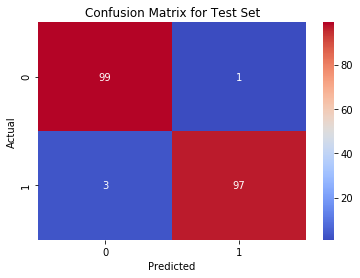

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       100
           1       0.99      0.97      0.98       100

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



<IPython.core.display.Javascript object>

In [49]:
y_pred = lr_cv.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_df = pd.DataFrame(
    confusion_matrix,
    index=["actual_Not_CHD", "actual_CHD"],
    columns=["pred_Not_CHD", "pred_CHD"],
)
display(confusion_df)

# Creating heatmap of confusion matrix
sns.heatmap(confusion_matrix, cmap="coolwarm", annot=True)
plt.title("Confusion Matrix for Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred))

<b>Precision</b>, which is the percentage of positive outcomes that are correctly predicted, is 97% for people who did not click on the ad, but 99% for people who clicked. This means that the model is better to correctly predict people who clicked on an ad then those who did not.

<b>Recall</b>, which is the percentage of actual positives that are correctly identified, is 99% for those who didn't click on ads, and 96% for the customer who cvlicked on ads. This means that the model is a bit better to distinguish actual negatives.

The <b>F1-score</b> is the weighted average balance between precision and recall. This takes both the false positives and false negatives into account. Overall, the model is able to predict the same for customers who clicked on ads and who didn't.

### Conclusions and next step

My goal was to build models that were able to predict if a customer will click on an ad based on their demoigraphic information : age, sex, time spent on the site as well as on the internet in general, timestamp, average income from customer's geographical area, city, country as well as the Ad headline. Using these features, I created logistic regression models, knn, random forest and gradient boosting classifier models to predict whether a customer will click on an ad. Overall all models predicted with over 95% accuracy but the winner was Logistic Regression.

For this dataset I was not able to use the ad headline and the country/city of the customer. For future datasets these categorical features can be encoded and added to the models. Also would be beneficial if we can collect additional data like: ads category, customer's marital status, aducation and income.